# Abhijith K S

# GRIP 

**Data Science and Buisness Analytics Internship**

# Task 3


**Perform Exploratory data analysis on
the data set SampleSuperstores**

**As a buisness manager,try to find out the weak areas where you can work to make more profits.**


**What all buisness problems can you derive from exploring the data.**

*Start by importing the needed libraries*

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

*Importing  the data set*

In [4]:
data = pd.read_csv("C:\\Users\\ABHI\\OneDrive\\Documents\\SampleSuperstore.csv")

*Main Steps in Exploratory data Analysis*


1.Cleaning data

In [34]:
data.head()


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Checking or null Values**

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#row,column count of data
data.shape

(9994, 13)

In [9]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

*Since there is data of only one country it is insignifant to use that colounm so we can eliminate that coloumn*

In [10]:
#dropping Country column
data=data.drop('Country',axis=1)
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
#row,column count of data
data.shape

(9994, 12)

*Here we had done the cleaning of the data. Next we can do Exploratory Analysis.*

## II-Exploratory Analysis :

*Checking the categories of items in the data set*

In [12]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
# number of products in each category 
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

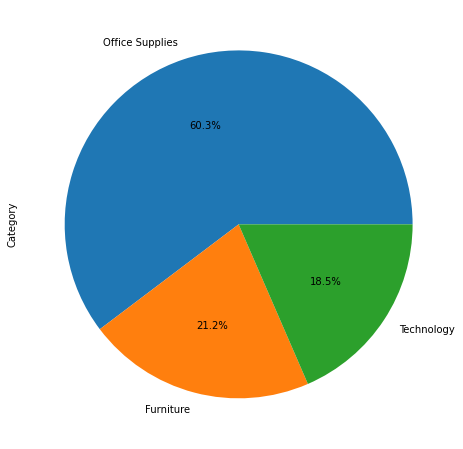

In [18]:
# plot of products in each category
plt.figure(figsize=(10,8))
data['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [19]:
#number of products in each sub-category
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

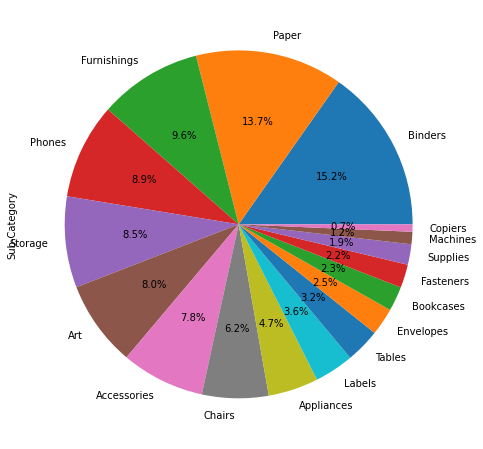

In [20]:
# plot of products in each sub-category
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-22-46e6c3a2d9e0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))


<Figure size 576x432 with 0 Axes>

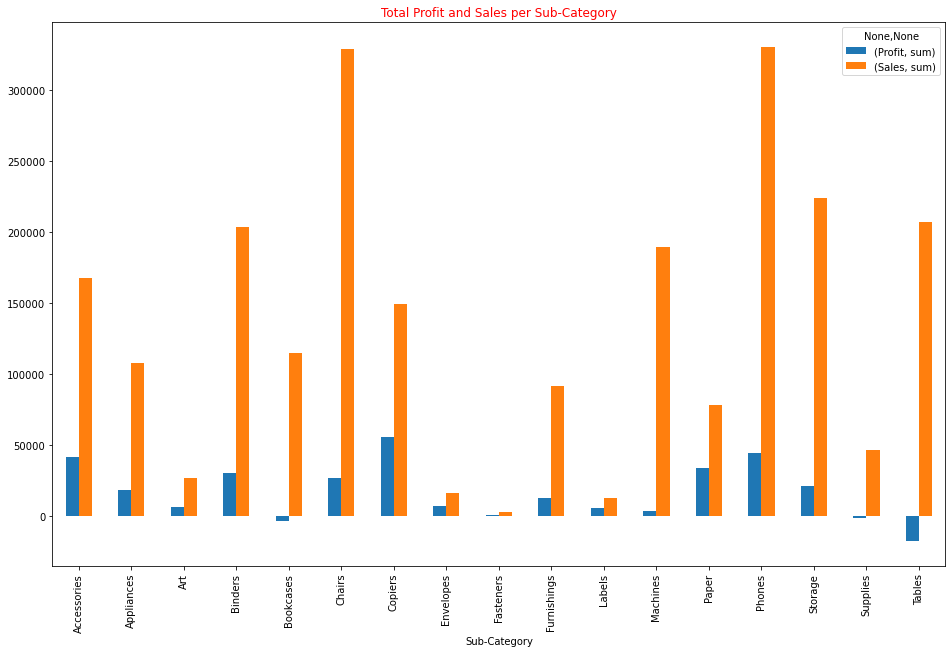

In [22]:
#To plot items to chec their profit or loss and sales
plt.figure(figsize=(8,6))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))
plt.title('Total Profit and Sales per Sub-Category',color='Red')
plt.show();

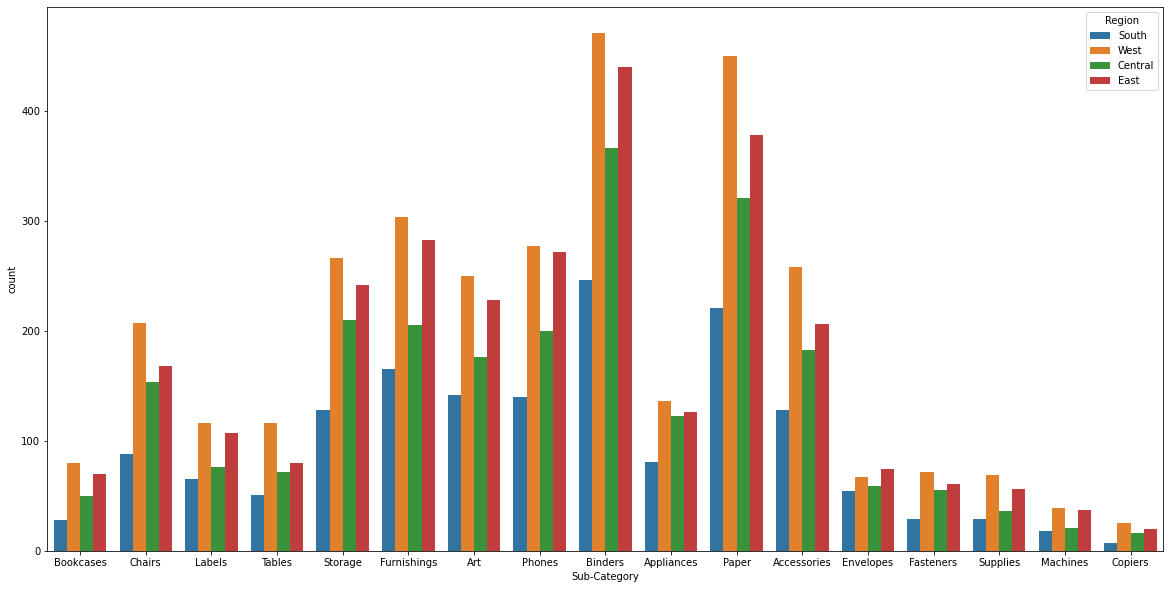

In [23]:
#Count of Sub-Category region wise
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

## The weak areas where we can work to make more profit ?

<AxesSubplot:xlabel='Region'>

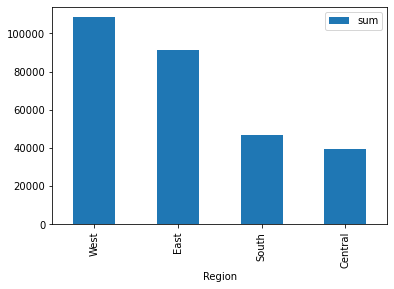

In [24]:
#Checking the Profit based on the Region :
data.groupby('Region')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar()

#### The Profit is maximum in the Western Region of the country and minimum in the Central Region of the country.

We now move on to checking the Profit earned in each the State :

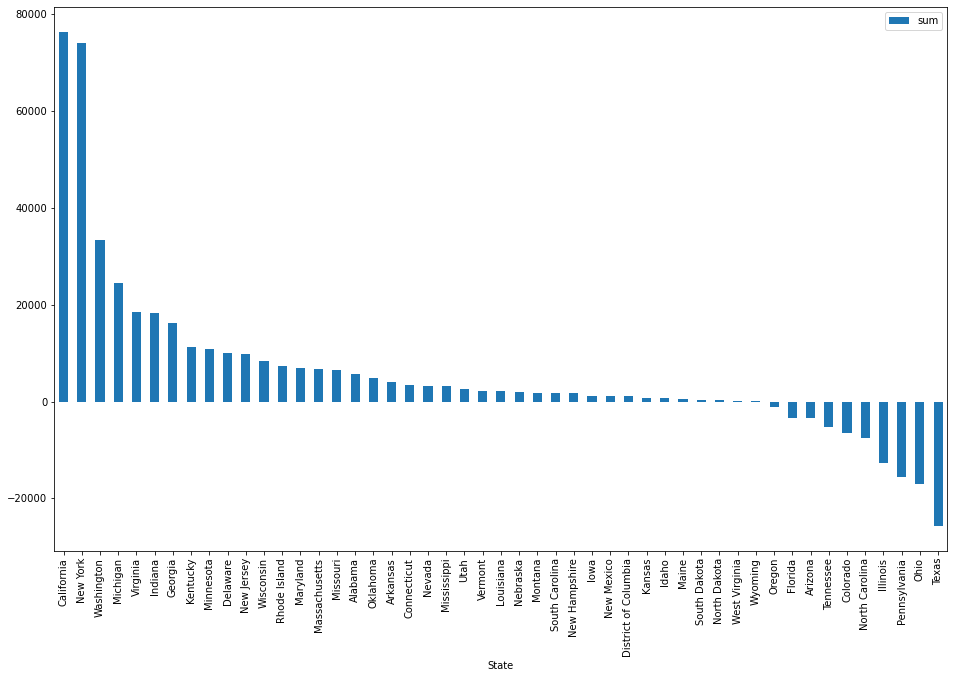

In [25]:
data.groupby('State')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(16,10));
                                                         

#### We can see that the maximum profits comes from the State of California followed by New York. And the minimum profits comes from the States of Texas followed by Ohio and Pensylvania.

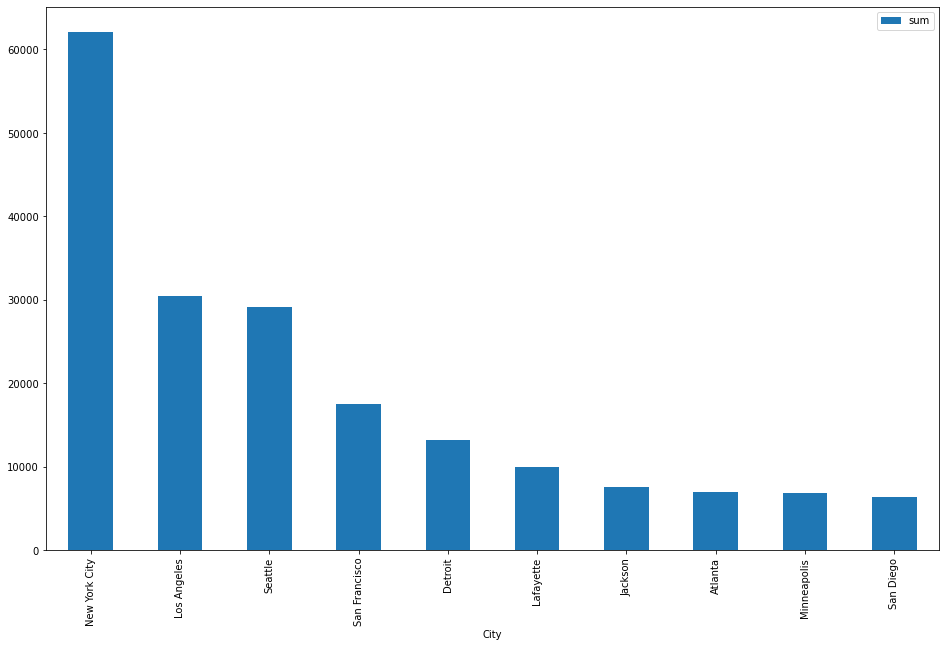

In [26]:
#Checking countries with maximum profits
data.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False)[:10].plot.bar(figsize=(16,10));
                                                         

#### The maximum profits in all the Cities comes from the New York City followed by Los Angeles and Seattle.

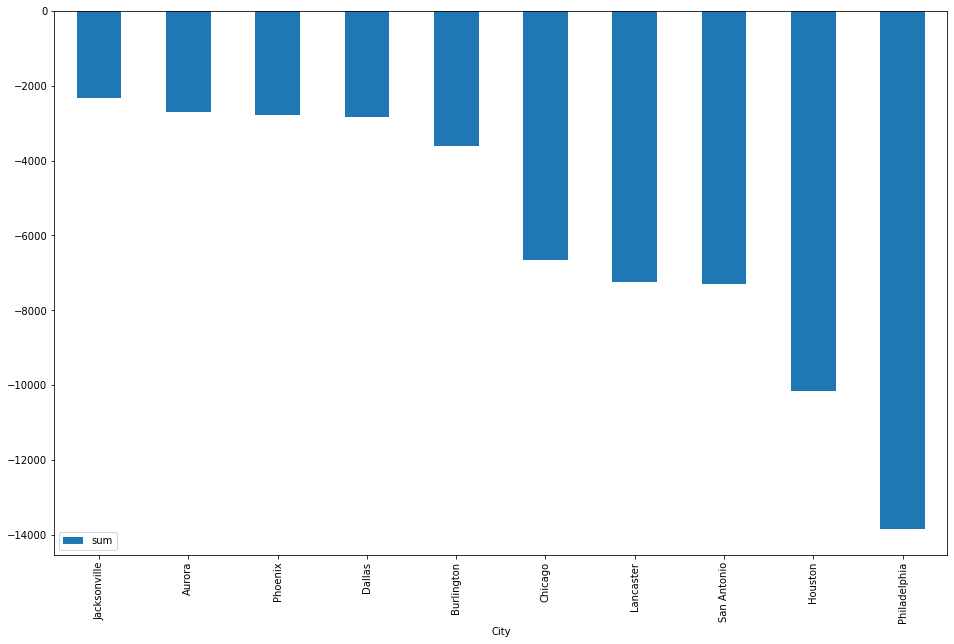

In [27]:
#Checking countries with minimum profits
data.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False)[521:].plot.bar(figsize=(16,10)); 
                                                         

#### The minimum profits in all the Cities comes from Philadelphia followed by Houston City.

## Total Profit VS Sub Category

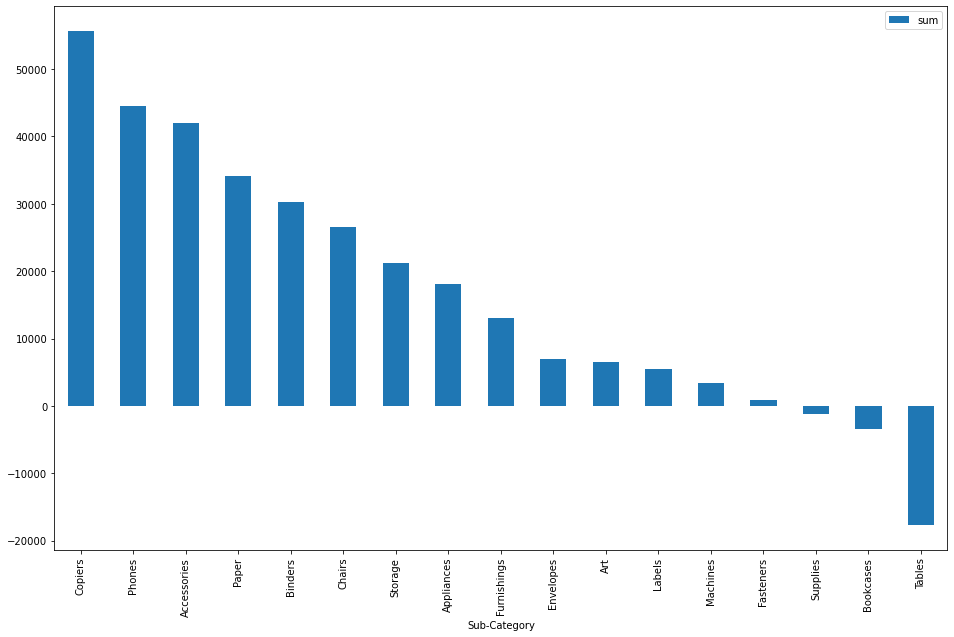

In [28]:
#Checking profits obtained from each subcategories.
data.groupby('Sub-Category')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(16,10));
                                                         

#### The maximum profit was earned by selling the copiers and the highest losses are incurred in selling the Tables, Bookcases and Supplies respectively.

## Profit VS Shipping Mode

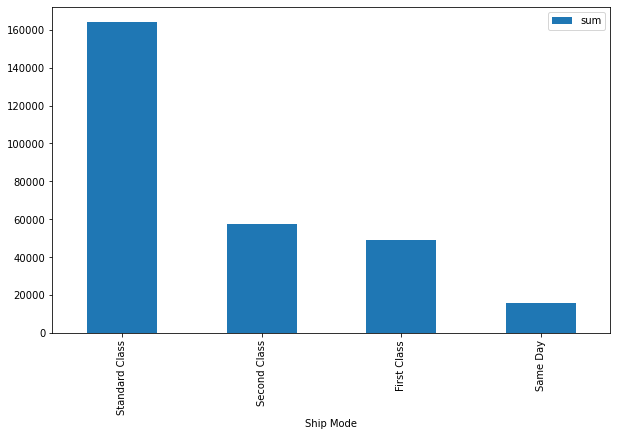

In [30]:
#Checking the profit change based on the shipping mode used
data.groupby('Ship Mode')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(10,6)); 
                                                         

#### This shows that the Standard Shipping is the most profitable Shipping Mode in all the Categories (>160 000).

## Profit in Each Segment

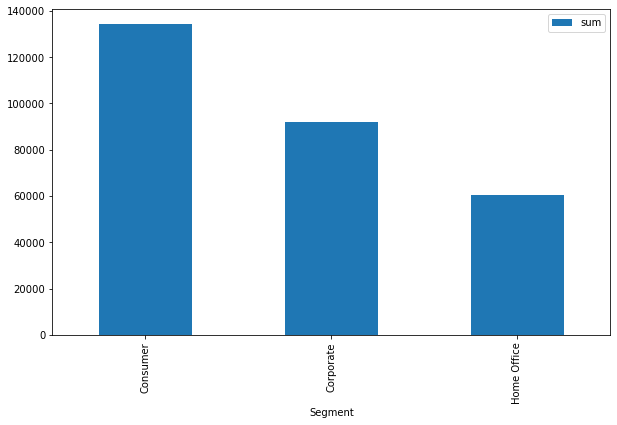

In [31]:
#Checking the profit obtained in each segments 
data.groupby('Segment')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(10,6)); 
                                                         

#### The most profitable Segment is Consumers followed by Corporate and Home Office.

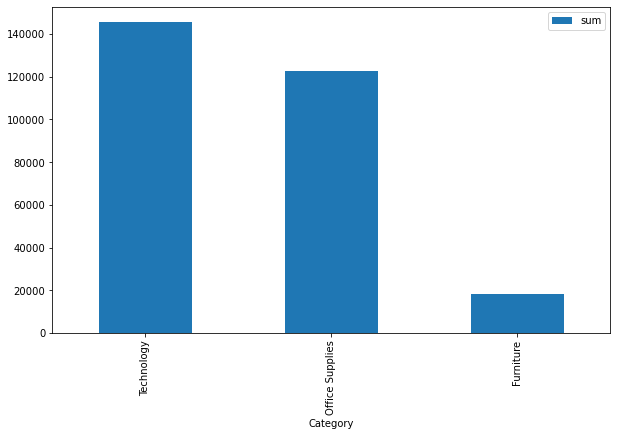

In [35]:
data.groupby('Category')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(10,6));
                                                         

#### We can see that the Technology is the most profitable category, followed by Office Supplies and Furniture.


# Conclusions



***1.Profit is maximum in the Western Region of the country and minimum in the Central Region of the country.***

***2.The maximum profits comes from the State of California followed by New York. 
  And the minimum profits comes from the States of Texas followed by Ohio and Pensylvania.***

***3.The maximum profits in all the Cities comes from the New York City followed by Los Angeles and Seattle.
  The minimum profits in all the Cities comes from Philadelphia followed by Houston City.***
    
***4.The maximum profit was earned by selling the copiers and the highest losses are incurred in selling the Tables, Bookcases     and Supplies respectively.***

***5.This shows that the Standard Shipping is the most profitable Shipping Mode in all the Categories.***

***6.The most profitable Segment is Consumers followed by Corporate and Home Office.***

***7.We can see that the Technology is the most profitable category, followed by Office Supplies and Furniture.***
